# Data Science Template

*This notebook can be used as a starting point for many common types of data science projects.<br />
**Please copy this notebook and work from the copy**.*

## Table of Contents
* [Package Imports](#Package-Imports)
* [Importing Data](#Importing-Data)
    * [URL and GET Request](#From-URL-and-GET-Request)
    * [Tabular](#From-Tabular-Data)
    * [SQL](#From-SQL)
    * [JSON](#From-JSON)
    * [HTML](#From-HTML)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
   * [Change Variable Types](#Change-Variable-Types-as-Needed)
   * [Look for Anomalies](#Look-for-Anomalies)
   * [Remove Data Points](#Remove-Data-Points-as-Needed)
* [Pandas](#Pandas)
   * [.loc](#.loc)
   * [.iloc](#.iloc)
   * [.ix](#.ix)
   * [Slicing DataFrames](#Slicing-DataFrames)
   * [Subset Using Criteria](#Subset-Based-on-Criteria)
* [Numpy](#Numpy)
   * [1D Vector Math](#Vector-Math---1-Dimension)

## Package Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## Configure Pandas Display

In [2]:
pd.set_option('display.max_columns', None)

## Importing Data

### From URL and GET Request

In [3]:
league_id = 849989
year = 2017
url = "https://fantasy.espn.com/apis/v3/games/ffl/leagueHistory/" + \
      str(league_id) + "?seasonId=" + str(year)
r_2017_scores = requests.get(url,
                             params = {"view": "mMatchup"},
                             cookies = {'swid': "{C3237527-A896-4050-A1A4-7B1119FD8C50}",
                                        'espn_s2': 'AEBppdM8aRL9v8ffZPUE7nLBtyOWYBIlmcCn6BsraemacFhoLUf1hwfHxu3vFRKd0L95RoehNafvK7rkEsKbvISLBp9VTeKxx5EucIPjWjkwChh%2FuiW3Q%2FSLn9EG9HCar0ix61TToa1lrwuSLbWLfmTvCBcQA4o6wrQoba96HpUrgKoz2f61MwKJsEUcQtDLYCnuEriSwI83OFcUYA%2F31eJ9eiJt98%2BZv7s4QnPE9oPRbs6%2Fdm%2BaRoYY4dpWxiyNeNw9f9fXJDPiUZ67zJEvYT8Q'})


### From Tabular Data
pandas.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
[source](https://github.com/pandas-dev/pandas/blob/v1.1.5/pandas/io/parsers.py#L535-L688)

In [104]:
csv_data = pd.read_csv(r"c:\Users\jusla\Documents\Laptop Backup\Experiment Data.csv")
csv_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,HIRE,Gender,Hours,Group,R1,R3,R7,R8,R9,R11,VAR00001,Scale,Average,Deviation,Deviation2
0,2,4,2,4,4,3,2,2,3,4,2,3,1,3,5,1,4,4,4,4,3,4,,45,3.75,.75,9
1,4,2,4,2,1,1,4,4,4,2,4,2,3,3,7,1,2,2,2,2,2,2,,22,1.83333333333333,-1.16666666666667,-14
2,2,4,2,4,3,2,2,4,3,4,2,4,1,3,9,1,4,4,4,2,3,4,,42,3.5,.5,6
3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,9,1,3,3,3,4,3,3,,37,3.08333333333333,.0833333333333335,1
4,1,5,1,5,5,5,1,1,1,5,1,5,1,1,5,3,5,5,5,5,5,5,,60,5,2,24


### From SQL
pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize=None)
[source](https://github.com/pandas-dev/pandas/blob/v1.1.5/pandas/io/parsers.py#L535-L688)

#### Please see [Database Connections (DB2)](#https://github.com/juslane13/Data/blob/master/Database%20Connections%20.ipynb) for more information.

### From JSON
pandas.read_json(path_or_buf=None, orient=None, typ='frame', dtype=None, convert_axes=None, convert_dates=True, keep_default_dates=True, numpy=False, precise_float=False, date_unit=None, encoding=None, lines=False, chunksize=None, compression='infer', nrows=None)
[source](https://github.com/pandas-dev/pandas/blob/v1.1.5/pandas/io/json/_json.py#L347-L622)

In [3]:
df1 = pd.DataFrame([['a', 'b'], ['c', 'd']],
                  index=['row 1', 'row 2'],
                  columns=['col 1', 'col 2'])
df2 = pd.DataFrame([['a', 'b'], ['c', 'd']],
                  index=['row 1', 'row 2'],
                  columns=['col 1', 'col 2'])
df3 = pd.DataFrame([['a', 'b'], ['c', 'd']],
                  index=['row 1', 'row 2'],
                  columns=['col 1', 'col 2'])

In [10]:
# Orient by Split
df1_json = df1.to_json(orient='split')
pd.read_json(df1_json, orient='split')

,col 1,col 2
row 1,a,b
row 2,c,d


In [13]:
# Orient by Index
df2_json = df2.to_json(orient='index')
pd.read_json(df2_json, orient='index')

,col 1,col 2
row 1,a,b
row 2,c,d


In [15]:
df3_json = df3.to_json(orient='records')
pd.read_json(df3_json, orient='records')

,col 1,col 2
0,a,b
1,c,d


### From HTML
pandas.read_html(io, match='.+', flavor=None, header=None, index_col=None, skiprows=None, attrs=None, parse_dates=False, thousands=',', encoding=None, decimal='.', converters=None, na_values=None, keep_default_na=True, displayed_only=True)
[source](https://github.com/pandas-dev/pandas/blob/v1.1.5/pandas/io/html.py#L928-L1102)

In [ ]:
url = 'https://www.fdic.gov/bank/individual/failed/banklist.html'
dfs = pd.read_html(url)
dfs

## Exploratory Data Analysis

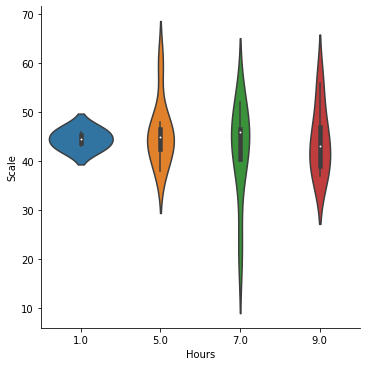

In [114]:
sns.catplot(data=csv_data, kind='violin',
           x='Hours', y='Scale')
plt.show()

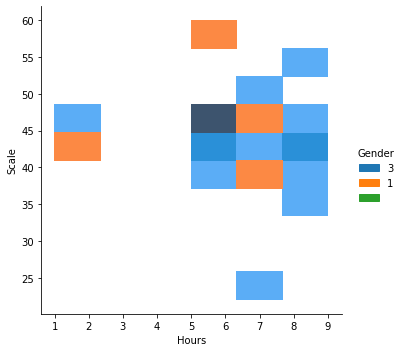

In [106]:
sns.displot(data=csv_data, kind='hist',
           x='Hours', y='Scale', hue='Gender')
plt.show()

### Change Variable Types as Needed

In [30]:
print("Hours Type:", type(csv_data['Hours'][0]))
print("Scale Type:", type(csv_data['Scale'][0]))

Hours Type: <class 'str'>
Scale Type: <class 'str'>


In [105]:
csv_data['Hours'] = pd.to_numeric(csv_data['Hours'], errors='coerce')
csv_data['Scale'] = pd.to_numeric(csv_data['Scale'], errors='coerce')
print("Hours Type:", type(csv_data['Hours'][0]))
print("Scale Type:", type(csv_data['Scale'][0]))

Hours Type: <class 'numpy.float64'>
Scale Type: <class 'numpy.float64'>


### Look for Anomalies

In [107]:
csv_data = csv_data.replace(' ', np.nan)
nan_indices = csv_data.isnull().sum()
nan_indices

V1             1
V2             1
V3             1
V4             1
V5             1
V6             1
V7             1
V8             1
V9             1
V10            1
V11            1
V12            1
HIRE           1
Gender         1
Hours          1
Group          1
R1             1
R3             1
R7             1
R8             1
R9             1
R11            1
VAR00001      24
Scale          1
Average        1
Deviation      1
Deviation2     1
dtype: int64

In [108]:
csv_data['Gender']

0       3
1       3
2       3
3       3
4       1
5       1
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      1
14      3
15      3
16      3
17      1
18      3
19      3
20      3
21      3
22      3
23    NaN
Name: Gender, dtype: object

In [110]:
csv_data[23:]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,HIRE,Gender,Hours,Group,R1,R3,R7,R8,R9,R11,VAR00001,Scale,Average,Deviation,Deviation2
22,1,4,2,4,5,3,2,2,3,4,4,4,1,3,5.0,7,5,4,4,4,3,2,NaN,46.0,3.83333333333333,.833333333333333,10
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
csv_data["VAR00001"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: VAR00001, dtype: float64

### Remove Data Points as Needed

In [113]:
csv_data = csv_data.drop(labels="VAR00001", axis=1)
csv_data = csv_data[0:23]
csv_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,HIRE,Gender,Hours,Group,R1,R3,R7,R8,R9,R11,Scale,Average,Deviation,Deviation2
0,2,4,2,4,4,3,2,2,3,4,2,3,1,3,5.0,1,4,4,4,4,3,4,45.0,3.75,.75,9
1,4,2,4,2,1,1,4,4,4,2,4,2,3,3,7.0,1,2,2,2,2,2,2,22.0,1.83333333333333,-1.16666666666667,-14
2,2,4,2,4,3,2,2,4,3,4,2,4,1,3,9.0,1,4,4,4,2,3,4,42.0,3.5,.5,6
3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,9.0,1,3,3,3,4,3,3,37.0,3.08333333333333,.0833333333333335,1
4,1,5,1,5,5,5,1,1,1,5,1,5,1,1,5.0,3,5,5,5,5,5,5,60.0,5,2,24
5,2,4,3,3,3,4,2,2,2,4,3,3,1,1,1.0,3,4,3,4,4,4,3,43.0,3.58333333333333,.583333333333333,7
6,1,5,1,5,5,5,1,1,3,3,3,3,1,3,7.0,3,5,5,5,5,3,3,52.0,4.33333333333333,1.33333333333333,16
7,2,4,2,4,4,4,2,2,2,4,2,4,1,3,5.0,3,4,4,4,4,4,4,48.0,4,1,12
8,2,5,1,4,5,5,1,2,1,5,1,4,1,3,9.0,3,4,5,5,4,5,5,56.0,4.66666666666667,1.66666666666667,20
9,2,4,2,3,4,3,2,2,2,4,2,4,1,3,7.0,3,4,4,4,4,4,4,46.0,3.83333333333333,.833333333333333,10


## Pandas

In [64]:
import pandas as pd

df_dict = {"Band": ["Tool", "Pink Floyd", "Rush"],
           "Genre": ["Progressive Metal", "Progressive Rock", "Progressive Rock"],
           "Song": ["Forty Six & 2", "Comfortably Numb", "Tom Sawyer"]}
df = pd.DataFrame(df_dict)
df = df.append({"Band": "Circa Survive",
                "Genre": "Indie",
                "Song": "Lazarus"}, ignore_index=True)
df

,Band,Genre,Song
0,Tool,Progressive Metal,Forty Six & 2
1,Pink Floyd,Progressive Rock,Comfortably Numb
2,Rush,Progressive Rock,Tom Sawyer
3,Circa Survive,Indie,Lazarus


### .loc
.loc is primarily label based; when two arguments are used, you use column headers and row indexes to select the data you want. .loc can also take an integer as a row or column number.
[source](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

In [52]:
def print_df(df):
    for i in range(len(df['Band'])):
        print("Band {}:\n".format(i),
              "Band: {}".format(df.loc[i, "Band"]),  # Uses an integer index for first argument and a key for the second; 
              "\tGenre: {}".format(df.loc[i, "Genre"]), # [0, "Genre"] in this case
              "\tSong: {}".format(df.loc[i, "Song"]))

print_df(df)

Band 0:
 Band: Tool 	Genre: Progressive Metal 	Song: Forty Six & 2
Band 1:
 Band: Pink Floyd 	Genre: Progressive Rock 	Song: Comfortably Numb
Band 2:
 Band: Circa Survive 	Genre: Indie 	Song: Lazarus


### .iloc
.iloc is integer-based. You use column numbers and row numbers to get rows or columns at particular positions in the data frame. [source](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [56]:
def i_print_df(df):
    for i in range(len(df['Band'])):
        print("Band {}:\n".format(i),
              "Band: {}".format(df.iloc[i, 0]), # Uses an integer index for both arguments; [0,0] in this case
              "\tGenre: {}".format(df.iloc[i, 1]),
              "\tSong: {}".format(df.iloc[i, 2]))

i_print_df(df)

Band 0:
 Band: Tool 	Genre: Progressive Metal 	Song: Forty Six & 2
Band 1:
 Band: Pink Floyd 	Genre: Progressive Rock 	Song: Comfortably Numb
Band 2:
 Band: Circa Survive 	Genre: Indie 	Song: Lazarus


### .ix
By default, ix looks for a label. If ix doesn't find a label, it will use an integer. This means you can select data by using either column numbers and row numbers or column headers and row names using ix.

In Pandas version 0.20.0 and later, ix is deprecated. [source](https://www.geeksforgeeks.org/python-pandas-dataframe-ix/)

### Slicing DataFrames
You can also slice data frames and assign the values to a new data frame using the column names. 

In [61]:
# Get just the list of bands
bands = df.loc[:,"Band"]
print(bands, "\n")

# Get just the first band and its row data
band_one = df.loc[0,:]
print(band_one)

0             Tool
1       Pink Floyd
2    Circa Survive
Name: Band, dtype: object 

Band                  Tool
Genre    Progressive Metal
Song         Forty Six & 2
Name: 0, dtype: object


### Subset Based on Criteria
You can use conditionals to subset a DataFrame

In [66]:
# Select only bands from the Genre "Progressive Rock"
df_prog_rock = df[df['Genre']=='Progressive Rock']
df_prog_rock

,Band,Genre,Song
1,Pink Floyd,Progressive Rock,Comfortably Numb
2,Rush,Progressive Rock,Tom Sawyer


In [71]:
# The following is the same as above, but broken up into steps
df_prog_rock_bool = df['Genre']=='Progressive Rock' # Create a list of bool values, returning True if criteria is met
print("Bool Values:\n", df_prog_rock_bool, "\n")
df_prog_rock = df[df_prog_rock_bool] # Using the list of bool values, slice the original DataFrame
print("Sliced Using Bool Values:\n", df_prog_rock, "\n")

Bool Values:
 0    False
1     True
2     True
3    False
Name: Genre, dtype: bool 

Sliced Using Bool Values:
          Band             Genre              Song
1  Pink Floyd  Progressive Rock  Comfortably Numb
2        Rush  Progressive Rock        Tom Sawyer 



## Numpy

In [73]:
import numpy as np

### Basic Functions

In [104]:
# Assign 3 vectors as numpy arrays
vector1 = np.array([1, 0, 0])
vector2 = np.array([0, 1, 0])
vector3 = np.array([0, 0, 1])

In [111]:
print("Size: %d" % vector1.size) # len of vector
print("Shape: %d" % vector1.shape) # tuple of size in each direction
print("Dimensions: %d" % vector1.ndim) # dimension of array(s)

Size: 3
Shape: 3
Dimensions: 1


### Vector Operations - 1 Dimension

In [81]:
# Addition
vector1 + vector2 + vector3

array([1, 1, 1])

In [82]:
# Subtraction
vector1 - vector3

array([ 1,  0, -1])

In [84]:
# PEMDAS
vector1 * 2 + vector3

array([2, 0, 1])

In [88]:
# Dot Product; output is a number representing similarity between arrays
print(np.dot(vector1, vector2))
newVector = (vector1 * 2 + vector3) * 2
print(np.dot(vector1, newVector))

0
4


In [114]:
# Descriptive Statistics
print("Max: {}".format(vector1.max()))
print("Mean: {}".format(vector1.mean()))
print("Std: {}".format(vector1.std()))

Max: 1
Mean: 0.3333333333333333
Std: 0.4714045207910317


In [115]:
# pi, sin, etc.
x = [0, np.pi/2, np.pi]
y = np.sin(x)
print(x)
print(y)

[0, 1.5707963267948966, 3.141592653589793]
[0.0000000e+00 1.0000000e+00 1.2246468e-16]


### Create a number line

In [135]:
num_line = np.linspace(0, 2*np.pi, num = 100) # Produce 100 samples from 0 to 2pi
num_line

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

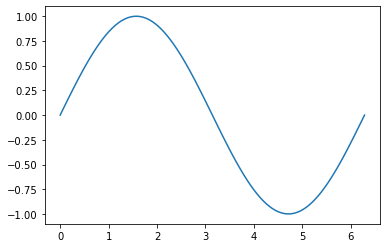

In [136]:
# plot it
import matplotlib.pyplot as plt
# need this because we are in a notebook
%matplotlib inline 

y = np.sin(num_line)
plt.plot(num_line, y)

### Plotting Functions

In [121]:
def Plot3vec(u, z, v):
    
    ax = plt.axes()
    ax.arrow(0, 0, *u, head_width=0.05, color='r', head_length=0.1)
    plt.text(*(u + 0.1), 'u')
    
    ax.arrow(0, 0, *v, head_width=0.05, color='b', head_length=0.1)
    plt.text(*(v + 0.1), 'v')
    ax.arrow(0, 0, *z, head_width=0.05, head_length=0.1)
    plt.text(*(z + 0.1), 'z')
    plt.ylim(-2, 2)
    plt.xlim(-2, 2)

def Plot2vec(a,b):
    ax = plt.axes()
    ax.arrow(0, 0, *a, head_width=0.05, color ='r', head_length=0.1)
    plt.text(*(a + 0.1), 'a')
    ax.arrow(0, 0, *b, head_width=0.05, color ='b', head_length=0.1)
    plt.text(*(b + 0.1), 'b')
    plt.ylim(-2, 2)
    plt.xlim(-2, 2)

u = np.array([1,0])
v = np.array([0,1])
z = u + v

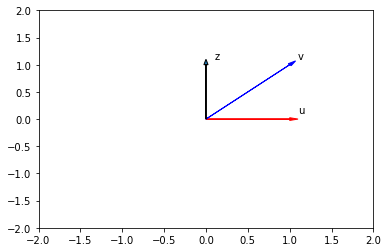

In [122]:
Plot3vec(u, v, z)

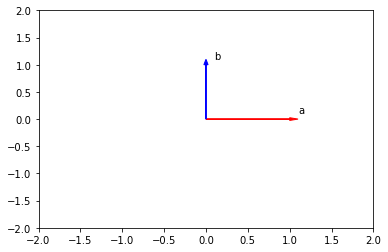

In [123]:
Plot2vec(u, v)

### Vector Operations - 2+ Dimensions

In [174]:
array_2d = np.array([[1,0,1], [0,0,1], [0,1,1]])
print("Size: {}".format(array_2d.size)) # len of vector
print("Shape: {}".format(array_2d.shape)) # tuple of size in each direction
print("Dimensions: {}".format(array_2d.ndim)) # dimension of array(s)

Size: 9
Shape: (3, 3)
Dimensions: 2


In [131]:
array_3d = np.array([[[1,0], [0,1], [1,1]],[[0,0], [1,1], [0,1]]])
print("Size: {}".format(array_3d.size)) # len of vector
print("Shape: {}".format(array_3d.shape)) # tuple of size in each direction
print("Dimensions: {}".format(array_3d.ndim)) # dimension of array(s)

Size: 12
Shape: (2, 3, 2)
Dimensions: 3


### Accessing Data and Slicing

In [143]:
print(array_2d)
print(array_2d[0,0])
print(array_2d[1,1])
print(array_2d[2,2])

[[1 0 1]
 [0 0 1]
 [0 1 1]]
1
0
1


In [176]:
print(array_2d)
print(array_2d[0,0:2])
print(array_2d[1,1:3])

[[1 0 1]
 [0 0 1]
 [0 1 1]]
[1 0]
[0 1]


### Vector Math

In [154]:
# Make another 2D array
array_2d_1 = np.array([[1,0,0], [0,0,0], [1,1,1]])
print("Array 1:\n{}".format(array_2d))
print("Array 2:\n{}".format(array_2d_1))
print("Array 1 + Array 2:\n{}".format(array_2d + array_2d_1))
print("Array 1 - Array 2:\n{}".format(array_2d - array_2d_1))
print("Array 1 * Array 2:\n{}".format(array_2d * array_2d_1))
print("Array 1 o Array 2 Dot Product:\n{}".format(np.dot(array_2d, array_2d_1)))

Array 1:
[[1 0 1]
 [0 0 1]
 [0 1 1]]
Array 2:
[[1 0 0]
 [0 0 0]
 [1 1 1]]
Array 1 + Array 2:
[[2 0 1]
 [0 0 1]
 [1 2 2]]
Array 1 - Array 2:
[[ 0  0  1]
 [ 0  0  1]
 [-1  0  0]]
Array 1 * Array 2:
[[1 0 0]
 [0 0 0]
 [0 1 1]]
Array 1 & Array 2 Dot Product:
[[2 1 1]
 [1 1 1]
 [1 1 1]]


### When shape doesn't match

In [177]:
array_2d_2 = np.array([[[1,0,0], [0,0,1]], [[1,1,0],[0,1,1]]])
array_2d_3 = np.array([[[1,0], [0,0], [1,1]], [[0,1], [1,0], [0,1]]])
print("Array 1:\n{}\n".format(array_2d_2))
print("Array 2:\n{}\n".format(array_2d_3))
print("Array 1 Shape:\n{}\n".format(array_2d_2.shape))
print("Array 2 Shape:\n{}\n".format(array_2d_3.shape))
print("Array 1 Dimensions:\n{}\n".format(array_2d_2.ndim))
print("Array 2 Dimensions:\n{}\n".format(array_2d_3.ndim))

Array 1:
[[[1 0 0]
  [0 0 1]]

 [[1 1 0]
  [0 1 1]]]

Array 2:
[[[1 0]
  [0 0]
  [1 1]]

 [[0 1]
  [1 0]
  [0 1]]]

Array 1 Shape:
(2, 2, 3)

Array 2 Shape:
(2, 3, 2)

Array 1 Dimensions:
3

Array 2 Dimensions:
3



In [173]:
print("Array 1:\n{}".format(array_2d_2))
print("Array 2:\n{}".format(array_2d_3))
try:
    print("Array 1 + Array 2:\n{}".format(array_2d_2 + array_2d_3))
except ValueError as e:
    print("Could not add arrays")
try:
    print("Array 1 - Array 2:\n{}".format(array_2d_2 - array_2d_3))
except ValueError as e:
    print("Could not subtract arrays")
try:
    print("Array 1 * Array 2:\n{}".format(array_2d_2 * array_2d_3))
except ValueError as e:
    print("Could not multiply arrays")
try:
    print("Array 1 o Array 2 Dot Product:\n{}".format(np.dot(array_2d_2, array_2d_3)))
    print("Array 2 o Array 1 Dot Product:\n{}".format(np.dot(array_2d_3, array_2d_2)))
except ValueError as e:
    print("Could not get dot product of arrays")

Array 1:
[[[1 0 0]
  [0 0 1]]

 [[1 1 0]
  [0 1 1]]]
Array 2:
[[[1 0]
  [0 0]
  [1 1]]

 [[0 1]
  [1 0]
  [0 1]]]
Could not add arrays
Could not subtract arrays
Could not multiply arrays
Array 1 o Array 2 Dot Product:
[[[[1 0]
   [0 1]]

  [[1 1]
   [0 1]]]


 [[[1 0]
   [1 1]]

  [[1 1]
   [1 1]]]]
Array 2 o Array 1 Dot Product:
[[[[1 0 0]
   [1 1 0]]

  [[0 0 0]
   [0 0 0]]

  [[1 0 1]
   [1 2 1]]]


 [[[0 0 1]
   [0 1 1]]

  [[1 0 0]
   [1 1 0]]

  [[0 0 1]
   [0 1 1]]]]


### Matrix Transposition

In [180]:
print("Array:\n{}".format(array_2d_2))
print("\nTransposed:\n{}".format(array_2d_2.T))

Array:
[[[1 0 0]
  [0 0 1]]

 [[1 1 0]
  [0 1 1]]]

Transposed:
[[[1 1]
  [0 0]]

 [[0 1]
  [0 1]]

 [[0 0]
  [1 1]]]
